In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def prettyTable(dataframe, column):
    z = pd.DataFrame(columns = [dataframe[column].value_counts(True).index, round(dataframe[column].value_counts(True) * 100, 2).astype(str) + '%', dataframe[column].value_counts()]).T
    return z

%matplotlib inline

## Goals

The management would like you to answer the following:
* Are there products that do not sell as well in some locations?
* Are there any other patterns over time in each region that you can find in the data?

Viz:
* line chart showingn sales over time
    * dual axis showing profit over time
* scatter plot showing discount and profit, or sales and profit
    * legend is category
* box plot showing quantity by category
* box plot showing quantity by sub-category

Analysis:
* How does Discount relate to Profit?
* How does Category relate to Profit?
* How does Sub-Category relate to Profit?
* How does Ship Mode relate to Category, Sales, Discounnt, Profit?

In [2]:
df = pd.read_csv('office_supplies.csv')
df

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692
9989,US-2017-105998,2017-11-03,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.8900
9990,US-2017-105998,2017-11-03,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.9148
9991,US-2014-148194,2014-05-04,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.8976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [4]:
# what to do about the missing profit values?

In [5]:
df[df.Profit.isna()]
df[(df.Profit.isna()) & (df['Order ID'].str.contains('CA'))]
prettyTable(df[df.Profit.isna()], 'Region')

,,
,Region,Region
West,30.01%,598
East,29.0%,578
Central,25.39%,506
South,15.6%,311


In [6]:
prettyTable(df, 'Category')

,,
,Category,Category
Office Supplies,60.3%,6026
Furniture,21.22%,2121
Technology,18.47%,1846


In [7]:
prettyTable(df, 'Sub-Category')

,,
,Sub-Category,Sub-Category
Binders,15.24%,1523
Paper,13.71%,1370
Furnishings,9.58%,957
Phones,8.89%,888
Storage,8.47%,846
Art,7.97%,796
Accessories,7.76%,775
Chairs,6.17%,617
Appliances,4.66%,466


In [8]:
df[~df['Profit'].isna()].describe()

,Sales,Quantity,Discount,Profit
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,229.823459,3.786875,0.152864,28.134233
std,621.031927,2.211349,0.203951,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.814700
50%,54.352000,3.000000,0.150000,8.765100
75%,211.870000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df[df['Profit'] > -1000].describe()

,Sales,Quantity,Discount,Profit
count,7981.000000,7981.000000,7981.000000,7981.000000
mean,221.533630,3.782859,0.151699,33.073146
std,547.025678,2.211065,0.202621,192.776782
min,0.444000,1.000000,0.000000,-950.400000
25%,17.300000,2.000000,0.000000,1.870400
50%,53.920000,3.000000,0.150000,8.790600
75%,209.970000,5.000000,0.200000,29.994000
max,17499.950000,14.000000,0.800000,8399.976000


In [10]:
df[df['Profit'] < 8000].describe()

,Sales,Quantity,Discount,Profit
count,7999.000000,7999.000000,7999.000000,7999.000000
mean,227.664423,3.786723,0.152883,27.087622
std,590.281910,2.211446,0.203957,207.172870
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.814600
50%,54.336000,3.000000,0.150000,8.763000
75%,211.504000,5.000000,0.200000,29.950000
max,22638.480000,14.000000,0.800000,5039.985600


<AxesSubplot:xlabel='Profit'>

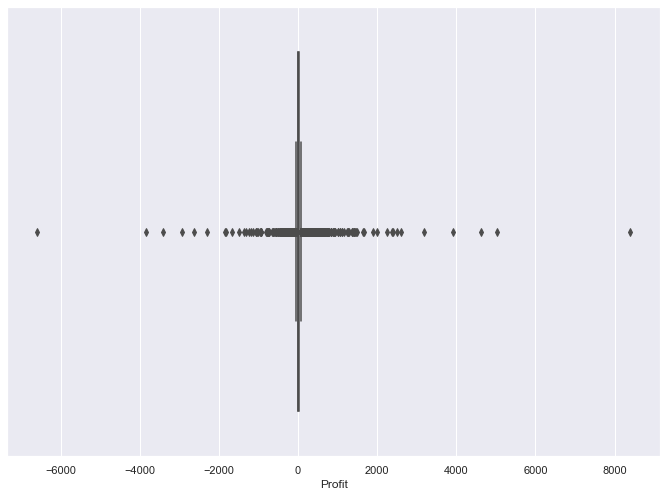

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df[~df['Profit'].isna()]['Profit'])

In [12]:
q75, q25 = np.percentile(df[~df['Profit'].isna()]['Profit'], [75 ,25])
iqr = q75 - q25
iqr

28.135800000000003

In [13]:
display(df[~df['Profit'].isna()]['Profit'].mean())
display(df[~df['Profit'].isna()]['Profit'].median())

28.13423282500004

8.7651

In [14]:
df = df.dropna()

In [15]:
# perc_95 = np.percentile(df[~df['Profit'].isna()]['Profit'], 90)
# perc_10 = np.percentile(df[~df['Profit'].isna()]['Profit'], 10)
# display(perc_95)
# display(perc_10)

# prof_mean_10_95 = df[(df['Profit'] < perc_95) & (df['Profit'] > perc_10)]['Profit'].mean()
# display(prof_mean_10_95)

# df['Profit'].fillna(prof_mean_10_95, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1993 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8000 non-null   object 
 1   Order Date    8000 non-null   object 
 2   Ship Mode     8000 non-null   object 
 3   Region        8000 non-null   object 
 4   Product ID    8000 non-null   object 
 5   Category      8000 non-null   object 
 6   Sub-Category  8000 non-null   object 
 7   Product Name  8000 non-null   object 
 8   Sales         8000 non-null   float64
 9   Quantity      8000 non-null   int64  
 10  Discount      8000 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 812.5+ KB


<AxesSubplot:xlabel='Profit'>

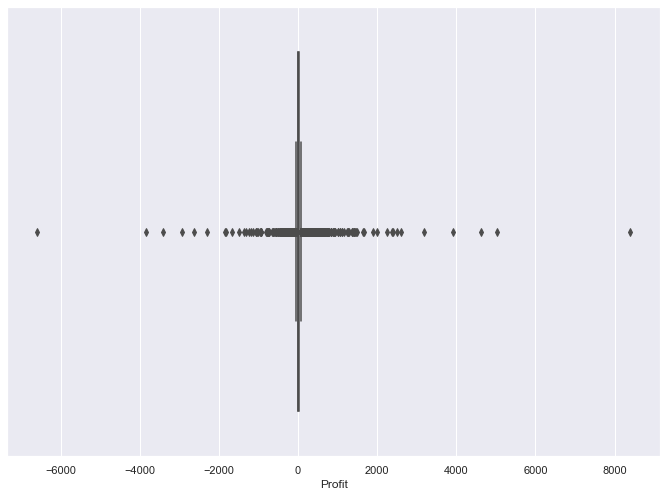

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Profit'])

<AxesSubplot:xlabel='Sales'>

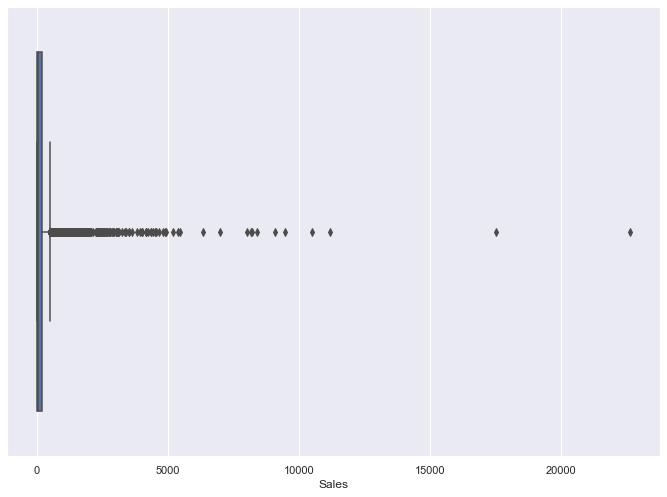

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Sales'])

<AxesSubplot:xlabel='Quantity'>

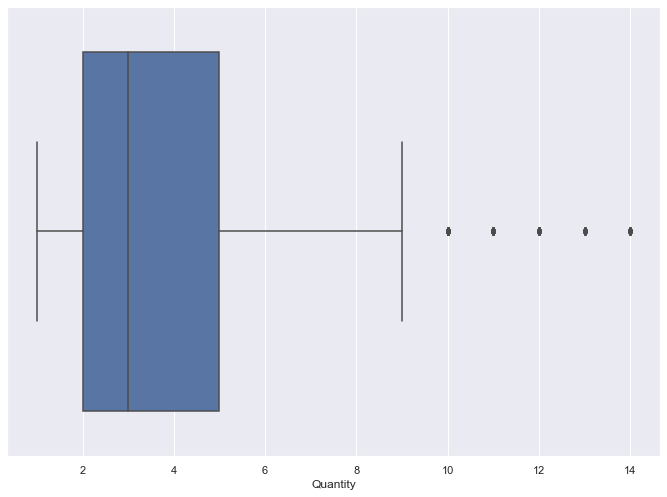

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Quantity'])

<AxesSubplot:xlabel='Discount'>

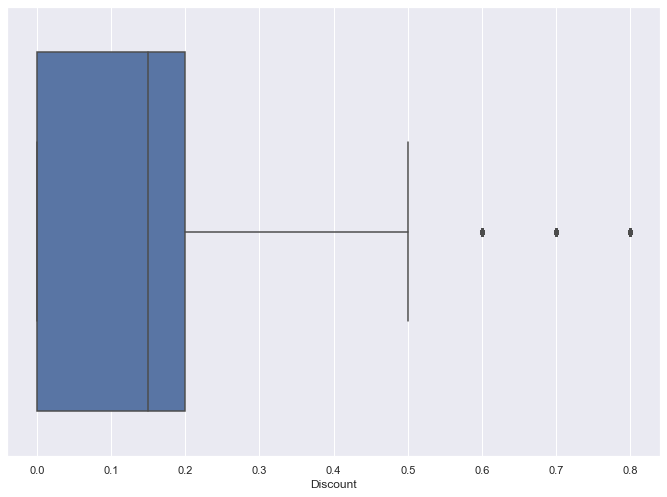

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Discount'])

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

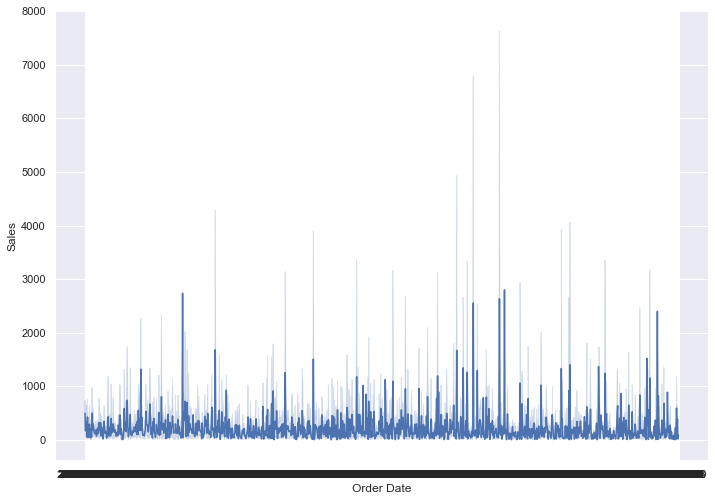

In [21]:
sns.lineplot(data = df, x = 'Order Date', y = 'Sales')

<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

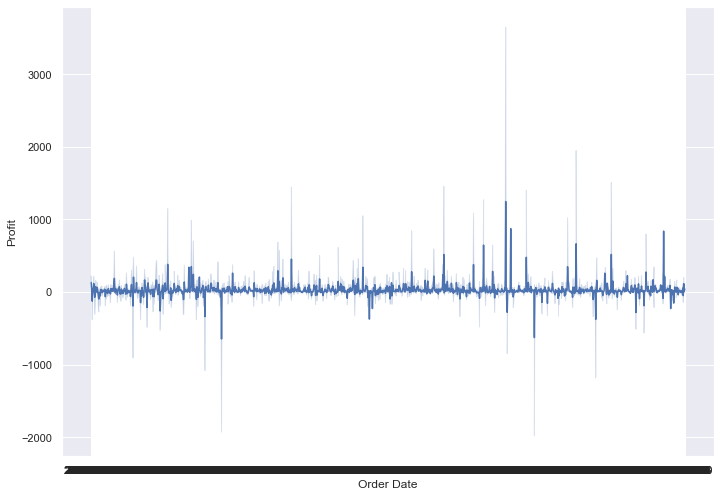

In [22]:
sns.lineplot(data = df, x = 'Order Date', y = 'Profit')

In [23]:
df = df.sort_values('Order Date')

In [24]:


df['Running Sales'] = df['Sales'].cumsum()
df['Running Profit'] = df['Profit'].cumsum()

In [25]:
df['Margin'] = df['Profit'] / df['Sales']
df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
9973,CA-2014-103800,2014-01-03,Standard Class,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,16.448,5.5512,0.3375
2732,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,28.232,9.8229,0.3625
2734,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,31.772,4.3359,-1.5500
2733,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,304.508,-60.4389,-0.2375
3752,CA-2014-141817,2014-01-05,Standard Class,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,324.044,-55.5549,0.2500


In [26]:
df['Profit'].sum() / df['Sales'].sum()

0.12241671473093248

<AxesSubplot:xlabel='Order Date', ylabel='Running Sales'>

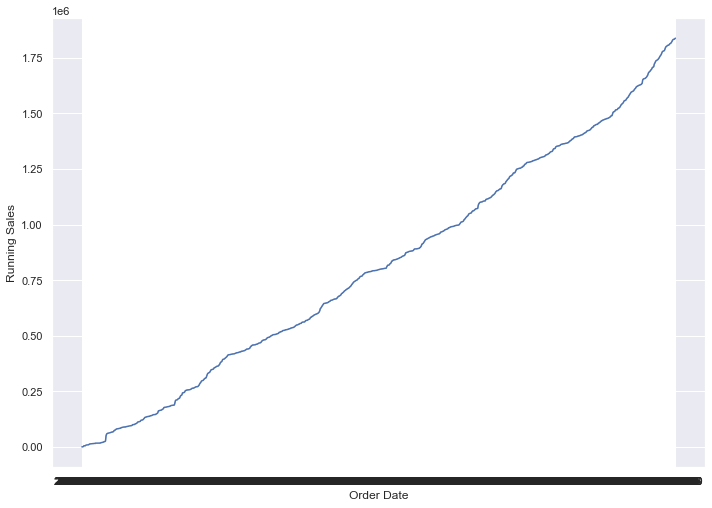

In [27]:
# sns.lineplot(data = df, x = 'Order Date', y = 'Running Sales')

<AxesSubplot:xlabel='Order Date', ylabel='Running Profit'>

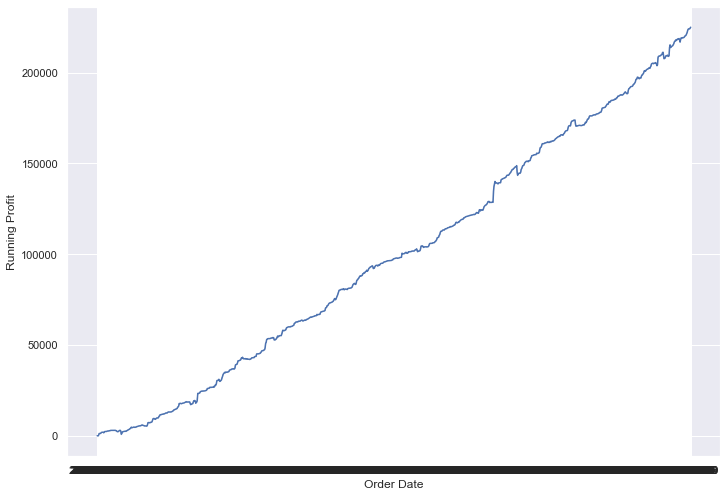

In [28]:
# sns.lineplot(data = df, x = 'Order Date', y = 'Running Profit')

In [29]:
display(df['Order Date'].min())
display(df['Order Date'].max())

'2014-01-03'

'2017-12-30'

In [30]:
sales_by_date = df['Running Sales'].groupby(df['Order Date']).sum()

In [31]:
sales_by_date = pd.DataFrame(sales_by_date)['Running Sales'].cumsum()

<AxesSubplot:xlabel='Order Date', ylabel='Running Sales'>

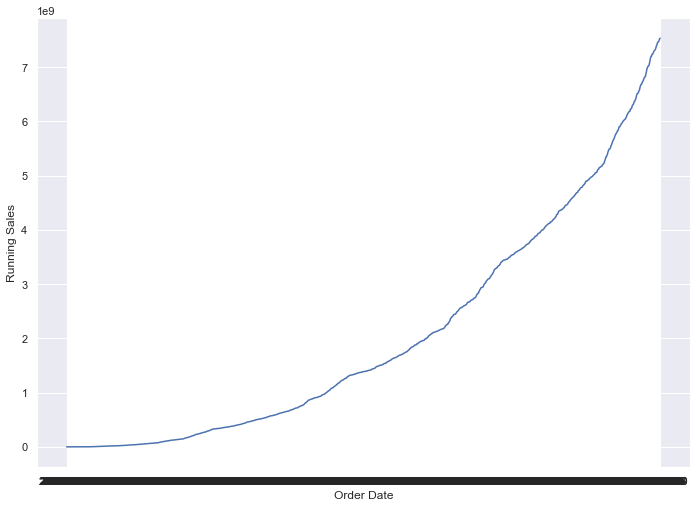

In [32]:
sns.lineplot(data = sales_by_date)

In [69]:
df2 = df.copy()

df2.index = pd.to_datetime(df['Order Date'])

df3 = df2.groupby(pd.Grouper(freq = 'M')).sum()

df3

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,
2014-01-31,13972.1410,259,8.90,2371.5095,5.820231e+05,1.141717e+05,9.148807
2014-02-28,3019.8080,99,5.60,617.6065,4.300281e+05,7.690278e+04,0.627500
2014-03-31,49351.6230,461,21.00,-103.8131,4.731865e+06,2.777400e+05,14.048492
2014-04-30,22280.7450,436,13.85,2426.8582,8.532926e+06,4.638402e+05,22.754510
2014-05-31,17434.7090,382,13.55,2375.0458,9.397098e+06,6.128087e+05,14.241856
2014-06-30,30503.4916,448,20.22,4288.7032,1.430545e+07,1.196256e+06,11.794678
2014-07-31,27592.3000,418,16.20,2609.1479,1.568382e+07,1.400221e+06,16.680238
2014-08-31,22072.1885,440,13.25,4004.9768,2.041072e+07,1.982331e+06,26.726573
2014-09-30,67442.9298,781,32.97,5867.6780,4.531067e+07,4.044636e+06,26.238768


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

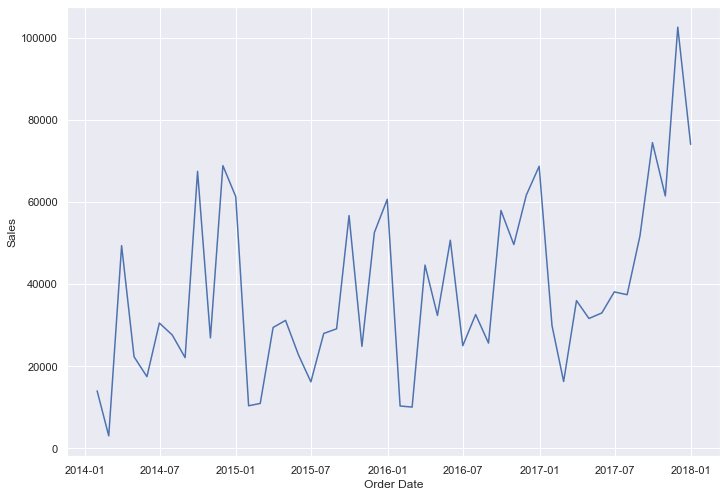

In [70]:
sns.lineplot(data = df3, x = df3.index, y = 'Sales')

<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

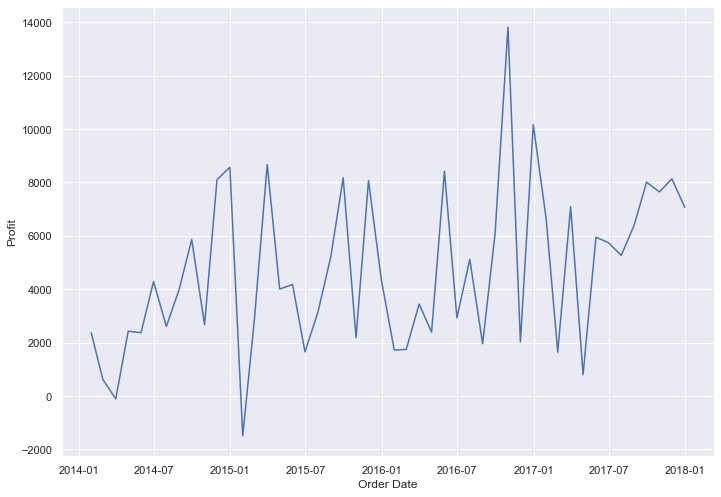

In [71]:
sns.lineplot(data = df3, x = df3.index, y = 'Profit')

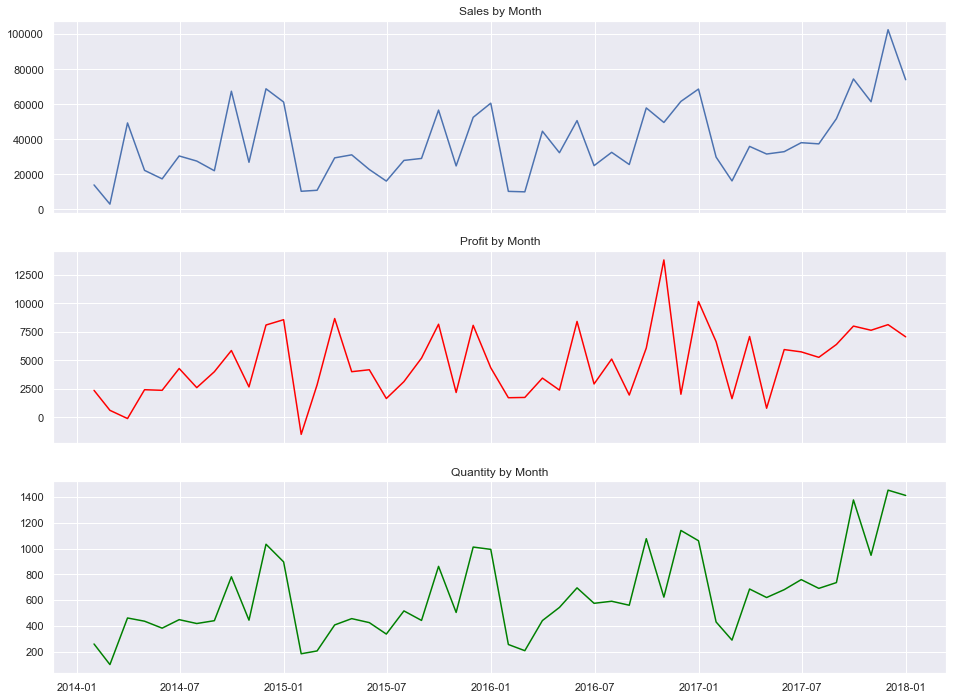

In [118]:
# plt.plot(df3, 'Sales', color='r', label='Sales')
# plt.plot(df3, 'Profit', color='g', label='Profit')

# plt.plot(df3.index, 'Sales')
# plt.plot(df3, 'Profit')
  
# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Date")
# plt.ylabel("Profit and Sales")
# plt.title("Profit and Sales")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend()
  
# # To load the display window
# plt.show()


fig, ax = plt.subplots(3, 
           sharex='col', sharey='row', figsize=(16,12))

# ax[0].text(0.5, 0.5, 
#               "top",
#               color="green",
#               fontsize=18, 
#               ha='center')

# ax[1].text(0.5, 0.5, 
#               "bottom",
#               color="green",
#               fontsize=18, 
#               ha='center')


# df.plot(subplots=True, layout=(2,1))
ax[0].plot(df3.index, "Sales", data=df3)
ax[0].set_title('Sales by Month')
ax[1].plot(df3.index, "Profit", data=df3, color = 'red')
ax[1].set_title('Profit by Month')
ax[2].plot(df3.index, "Quantity", data=df3, color = 'green')
ax[2].set_title('Quantity by Month')
plt.show()

<AxesSubplot:>

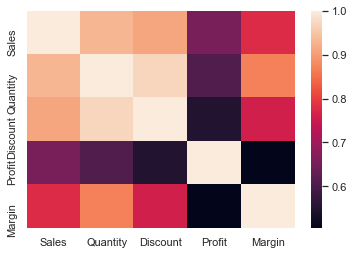

In [124]:
sns.heatmap(df3[['Sales', 'Quantity', 'Discount', 'Profit', 'Margin']].corr())

In [122]:
df3.corr()

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Sales,1.000000,0.931301,0.912616,0.657135,0.728975,0.718119,0.777893
Quantity,0.931301,1.000000,0.971171,0.607447,0.850111,0.841278,0.868873
Discount,0.912616,0.971171,1.000000,0.549880,0.829020,0.819934,0.760801
Profit,0.657135,0.607447,0.549880,1.000000,0.473600,0.467204,0.504122
Running Sales,0.728975,0.850111,0.829020,0.473600,1.000000,0.999494,0.760561
Running Profit,0.718119,0.841278,0.819934,0.467204,0.999494,1.000000,0.754905
Margin,0.777893,0.868873,0.760801,0.504122,0.760561,0.754905,1.000000


<AxesSubplot:>

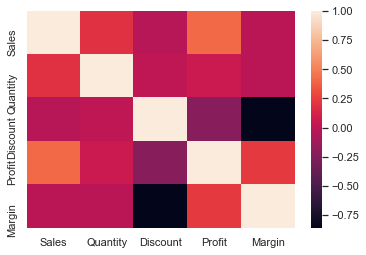

In [125]:
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Margin']].corr())

In [123]:
df.corr()

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Sales,1.000000,0.196896,-0.021971,0.414750,-0.015110,-0.015820,-0.004503
Quantity,0.196896,1.000000,0.013312,0.063334,-0.002871,-0.002759,-0.011525
Discount,-0.021971,0.013312,1.000000,-0.228720,0.000711,-0.000070,-0.863296
Profit,0.414750,0.063334,-0.228720,1.000000,-0.004819,-0.003661,0.232622
Running Sales,-0.015110,-0.002871,0.000711,-0.004819,1.000000,0.999022,-0.002655
Running Profit,-0.015820,-0.002759,-0.000070,-0.003661,0.999022,1.000000,-0.002066
Margin,-0.004503,-0.011525,-0.863296,0.232622,-0.002655,-0.002066,1.000000


In [33]:
df['Sales'].groupby(df['Region']).sum()

Region
Central    394604.9834
East       551176.3040
South      317934.8110
West       574871.5740
Name: Sales, dtype: float64

In [34]:
df['Profit'].groupby(df['Region']).sum()

Region
Central    34094.4879
East       72473.6505
South      38766.3684
West       79739.3558
Name: Profit, dtype: float64

In [35]:
prettyTable(df, 'Region')

,,
,Region,Region
West,32.56%,2605
East,28.38%,2270
Central,22.7%,1816
South,16.36%,1309


In [36]:
prettyTable(df, 'Category')

,,
,Category,Category
Office Supplies,60.5%,4840
Furniture,21.14%,1691
Technology,18.36%,1469


In [37]:
df['Category'].groupby(df['Region']).value_counts(True)

Region   Category       
Central  Office Supplies    0.616740
         Furniture          0.199339
         Technology         0.183921
East     Office Supplies    0.601322
         Furniture          0.209251
         Technology         0.189427
South    Office Supplies    0.612681
         Furniture          0.204736
         Technology         0.182582
West     Office Supplies    0.596161
         Furniture          0.224952
         Technology         0.178887
Name: Category, dtype: float64

In [38]:
df['Region'].groupby(df['Category']).value_counts(True)

Category         Region 
Furniture        West       0.346541
                 East       0.280899
                 Central    0.214075
                 South      0.158486
Office Supplies  West       0.320868
                 East       0.282025
                 Central    0.231405
                 South      0.165702
Technology       West       0.317223
                 East       0.292716
                 Central    0.227366
                 South      0.162696
Name: Region, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

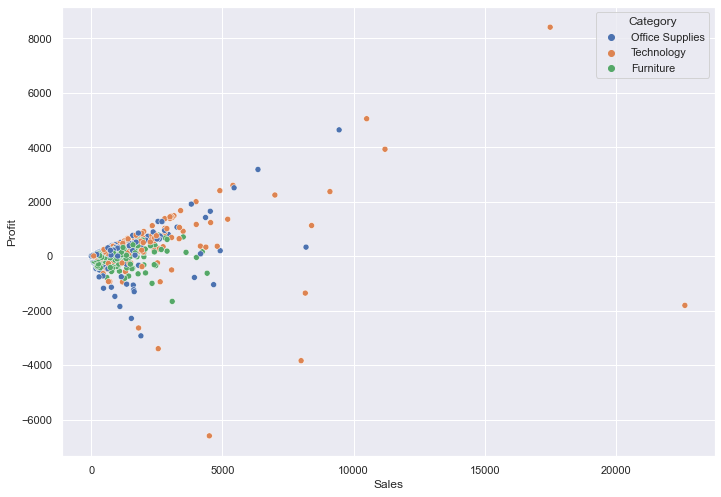

In [39]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

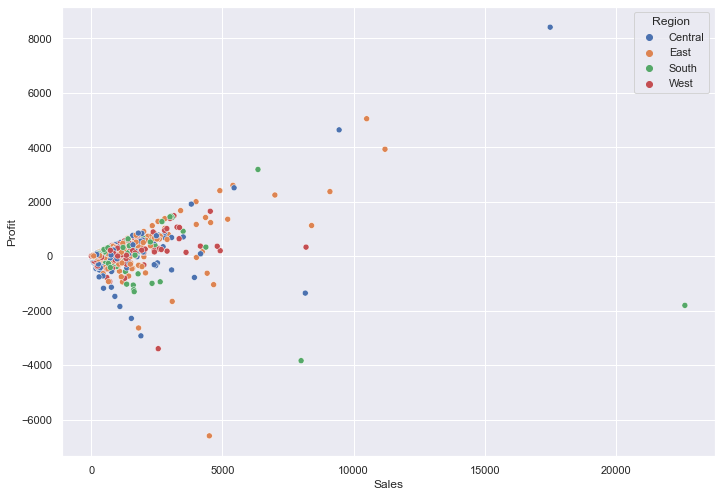

In [40]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', hue = 'Region')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

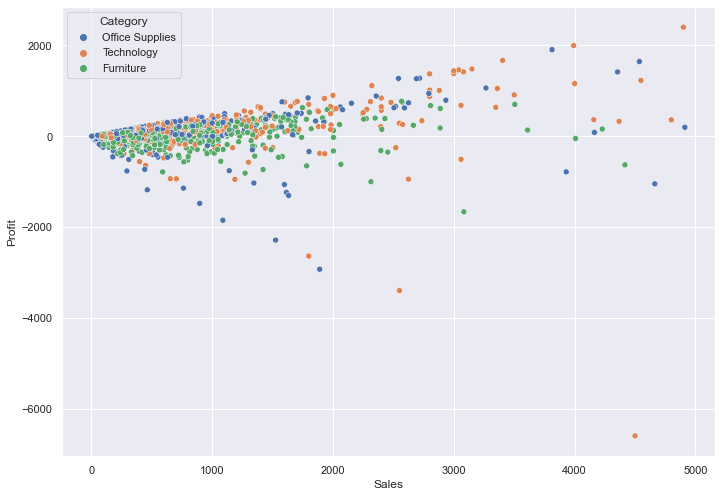

In [41]:
sns.scatterplot(data = df[df['Sales'] < 5000], x = 'Sales', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

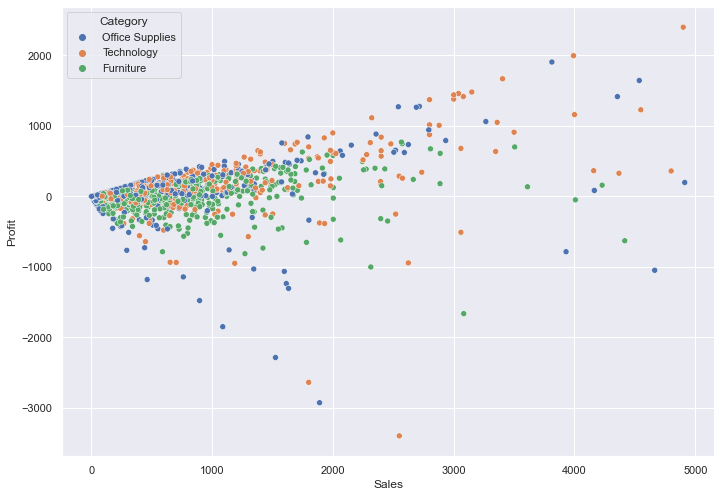

In [42]:
sns.scatterplot(data = df[(df['Sales'] < 5000) & (df['Profit'] > -4000)], x = 'Sales', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

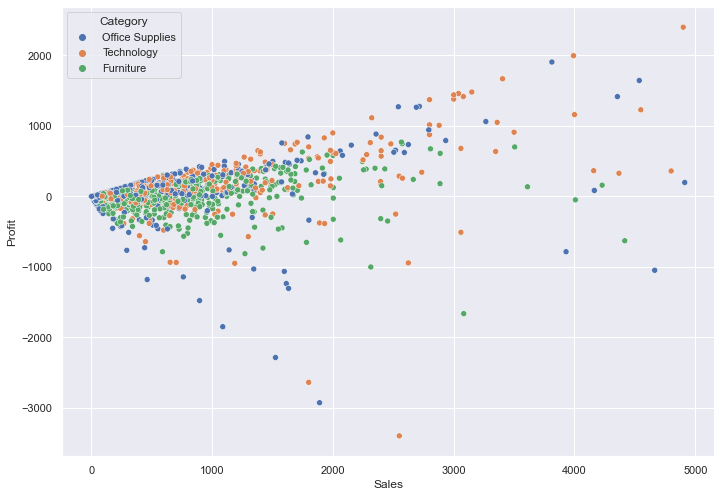

In [43]:
sns.scatterplot(data = df[(df['Sales'] < 5000) & (df['Profit'] > -4000)], x = 'Sales', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

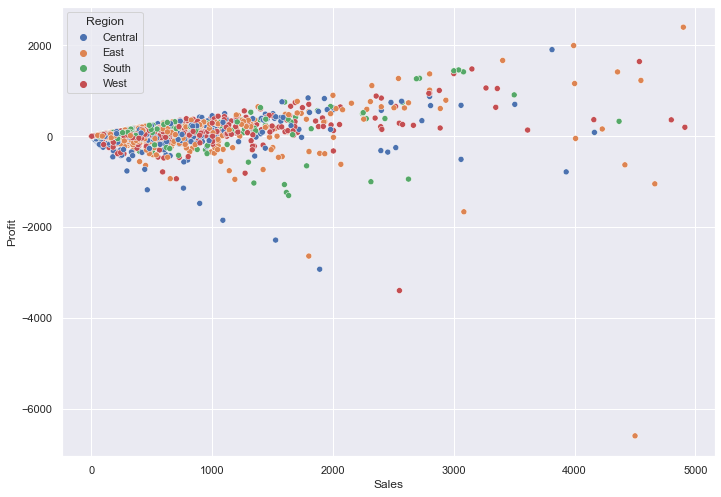

In [44]:
sns.scatterplot(data = df[df['Sales'] < 5000], x = 'Sales', y = 'Profit', hue = 'Region')

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

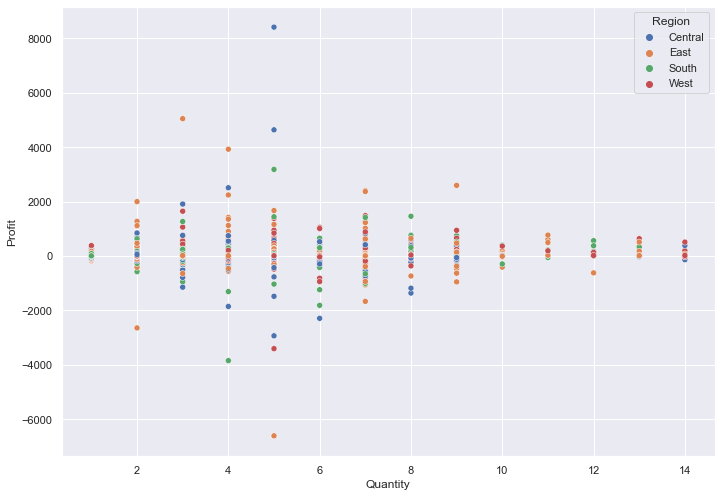

In [45]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Profit', hue = 'Region')

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

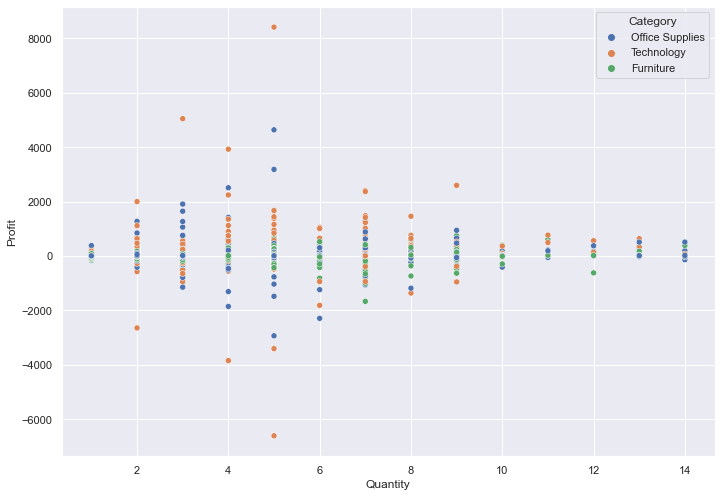

In [46]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Quantity', ylabel='Margin'>

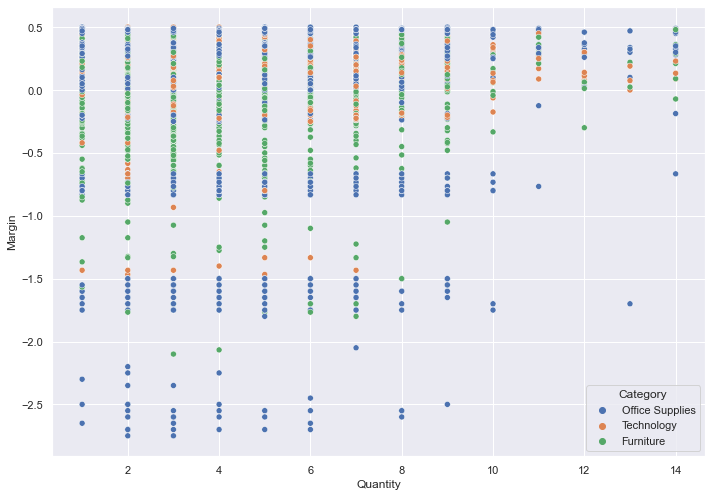

In [47]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Margin', hue = 'Category')

<AxesSubplot:xlabel='Quantity', ylabel='Margin'>

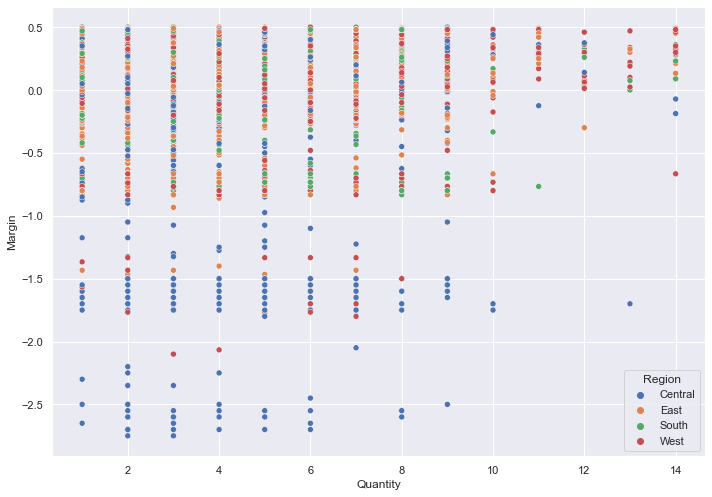

In [48]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Margin', hue = 'Region')

In [49]:
df.Margin.sort_values()[-10:]

9918    0.5
4585    0.5
7866    0.5
9223    0.5
5965    0.5
8952    0.5
8761    0.5
5674    0.5
7410    0.5
3153    0.5
Name: Margin, dtype: float64

In [50]:
df[df['Margin'].isna()]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin


In [51]:
prettyTable(df, 'Quantity')

,,
,Quantity,Quantity
3,24.4%,1952
2,23.65%,1892
5,12.16%,973
4,12.06%,965
1,9.07%,726
7,6.02%,482
6,5.74%,459
9,2.69%,215
8,2.62%,210


## Further Analysis

* Are there products that do not sell as well in some locations?
* Are there any other patterns over time in each region that you can find in the data?

In [126]:
df['Margin'].groupby(df['Region']).mean()

Region
Central   -0.076743
East       0.167070
South      0.170808
West       0.215075
Name: Margin, dtype: float64

In [127]:
df['Margin'].groupby(df['Category']).mean()

Category
Furniture          0.043665
Office Supplies    0.149056
Technology         0.155531
Name: Margin, dtype: float64

In [128]:
prettyTable(df, 'Region')

,,
,Region,Region
West,32.56%,2605
East,28.38%,2270
Central,22.7%,1816
South,16.36%,1309


In [129]:
prettyTable(df, 'Category')

,,
,Category,Category
Office Supplies,60.5%,4840
Furniture,21.14%,1691
Technology,18.36%,1469


In [145]:
display(df['Product ID'].nunique())

df['Product ID'].groupby(df['Region']).nunique()

1831

Region
Central    1157
East       1286
South       913
West       1406
Name: Product ID, dtype: int64

In [142]:
display(df['Product ID'].nunique())

df['Product ID'].groupby(df['Category']).nunique()

1831

Category
Furniture           371
Office Supplies    1068
Technology          392
Name: Product ID, dtype: int64

In [154]:
df.Region.unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [162]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count')


1831

Category,Furniture,Office Supplies,Technology
Region,,,
Central,362,1120,334
East,475,1365,430
South,268,802,239
West,586,1553,466


In [163]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count', margins = True)


1831

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,362,1120,334,1816
East,475,1365,430,2270
South,268,802,239,1309
West,586,1553,466,2605
All,1691,4840,1469,8000


In [163]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count', margins = True)


1831

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,362,1120,334,1816
East,475,1365,430,2270
South,268,802,239,1309
West,586,1553,466,2605
All,1691,4840,1469,8000


In [210]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc=pd.Series.nunique, margins = True)


1831

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,233,699,225,1157
East,260,766,260,1286
South,186,558,169,913
West,301,828,277,1406
All,371,1068,392,1831


In [211]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc=pd.Series.nunique) / df['Product ID'].groupby(df['Category']).nunique()


1831

Category,Furniture,Office Supplies,Technology
Region,,,
Central,0.628032,0.654494,0.573980
East,0.700809,0.717228,0.663265
South,0.501348,0.522472,0.431122
West,0.811321,0.775281,0.706633


In [206]:
df['Product ID'].groupby(df['Category']).nunique()

Category
Furniture           371
Office Supplies    1068
Technology          392
Name: Product ID, dtype: int64

In [205]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count') / df['Product ID'].groupby(df['Category']).count()


1831

Category,Furniture,Office Supplies,Technology
Region,,,
Central,0.214075,0.231405,0.227366
East,0.280899,0.282025,0.292716
South,0.158486,0.165702,0.162696
West,0.346541,0.320868,0.317223


In [189]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count', margins = True) / 8000


1831

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,0.045250,0.140000,0.041750,0.227000
East,0.059375,0.170625,0.053750,0.283750
South,0.033500,0.100250,0.029875,0.163625
West,0.073250,0.194125,0.058250,0.325625
All,0.211375,0.605000,0.183625,1.000000


In [201]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
print(df.pivot_table(index='Region', columns='Category', values='Product ID', aggfunc='count', margins = True) / 8000 * 100)


1831

Category  Furniture  Office Supplies  Technology       All
Region                                                    
Central      4.5250          14.0000      4.1750   22.7000
East         5.9375          17.0625      5.3750   28.3750
South        3.3500          10.0250      2.9875   16.3625
West         7.3250          19.4125      5.8250   32.5625
All         21.1375          60.5000     18.3625  100.0000


In [202]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Margin', aggfunc='mean')


1831

Category,Furniture,Office Supplies,Technology
Region,,,
Central,-0.169185,-0.122474,0.176797
East,0.090787,0.208825,0.118789
South,0.151964,0.170289,0.193682
West,0.087428,0.281379,0.154626


In [164]:
display(df['Product ID'].nunique())

# df.pivot(index='Region', columns='Category', values='Product ID')
df.pivot_table(index='Region', columns='Category', values='Margin', aggfunc='mean', margins = True)


1831

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,-0.169185,-0.122474,0.176797,-0.076743
East,0.090787,0.208825,0.118789,0.167070
South,0.151964,0.170289,0.193682,0.170808
West,0.087428,0.281379,0.154626,0.215075
All,0.043665,0.149056,0.155531,0.127968


In [165]:
df['Profit'].sum() / df['Sales'].sum()

0.12241671473093248

In [ ]:
# rolling window analysis of quantity, sales, profit, margin
# daily, monthly

In [212]:
df3

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,
2014-01-31,13972.1410,259,8.90,2371.5095,5.820231e+05,1.141717e+05,9.148807
2014-02-28,3019.8080,99,5.60,617.6065,4.300281e+05,7.690278e+04,0.627500
2014-03-31,49351.6230,461,21.00,-103.8131,4.731865e+06,2.777400e+05,14.048492
2014-04-30,22280.7450,436,13.85,2426.8582,8.532926e+06,4.638402e+05,22.754510
2014-05-31,17434.7090,382,13.55,2375.0458,9.397098e+06,6.128087e+05,14.241856
2014-06-30,30503.4916,448,20.22,4288.7032,1.430545e+07,1.196256e+06,11.794678
2014-07-31,27592.3000,418,16.20,2609.1479,1.568382e+07,1.400221e+06,16.680238
2014-08-31,22072.1885,440,13.25,4004.9768,2.041072e+07,1.982331e+06,26.726573
2014-09-30,67442.9298,781,32.97,5867.6780,4.531067e+07,4.044636e+06,26.238768


In [214]:
df4 = df2.groupby(pd.Grouper(freq = 'M')).mean()
df4

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,
2014-01-31,194.057514,3.597222,0.123611,32.937632,8.083654e+03,1585.717443,0.127067
2014-02-28,111.844741,3.666667,0.207407,22.874315,1.592697e+04,2848.251248,0.023241
2014-03-31,407.864653,3.809917,0.173554,-0.857960,3.910632e+04,2295.371672,0.116103
2014-04-30,204.410505,4.000000,0.127064,22.264754,7.828373e+04,4255.414995,0.208757
2014-05-31,177.905194,3.897959,0.138265,24.235161,9.588876e+04,6253.150506,0.145325
2014-06-30,262.961134,3.862069,0.174310,36.971579,1.233228e+05,10312.548822,0.101678
2014-07-31,257.871963,3.906542,0.151402,24.384560,1.465777e+05,13086.180500,0.155890
2014-08-31,190.277487,3.793103,0.114224,34.525662,1.759545e+05,17089.057728,0.230401
2014-09-30,324.244855,3.754808,0.158510,28.209990,2.178398e+05,19445.364203,0.126148


<AxesSubplot:xlabel='Order Date'>

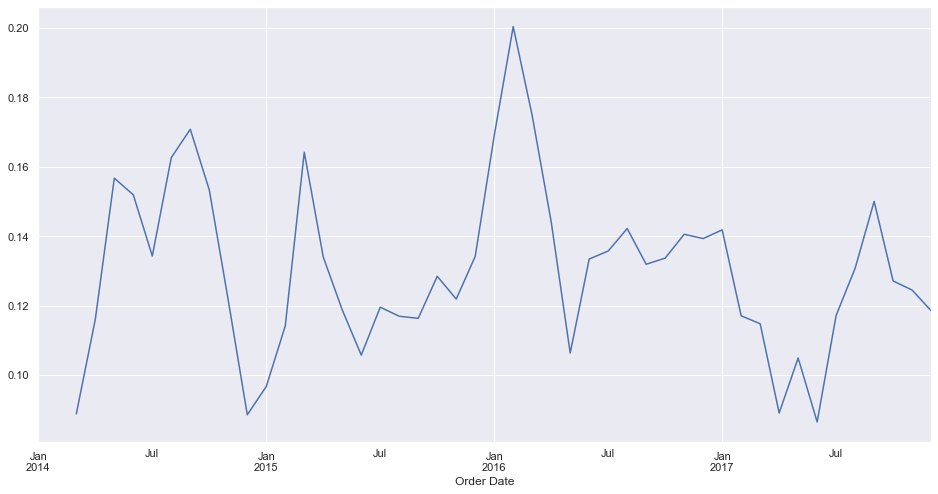

In [231]:
# Sales 	Quantity 	Discount 	Profit 	Running Sales 	Running Profit 	Margin
df4['Margin'].rolling(window = 3).mean().plot(figsize = (16,8))

<AxesSubplot:xlabel='Order Date'>

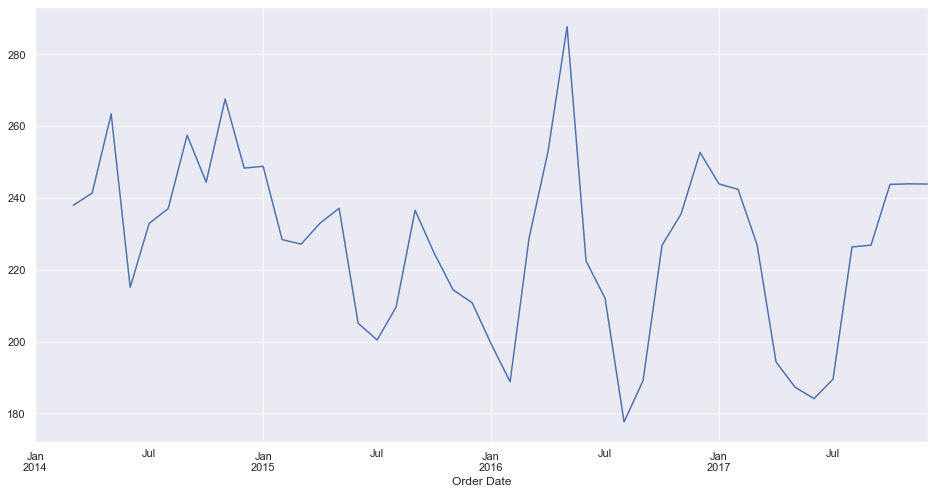

In [232]:
df4['Sales'].rolling(window = 3).mean().plot(figsize = (16,8))

<AxesSubplot:xlabel='Order Date'>

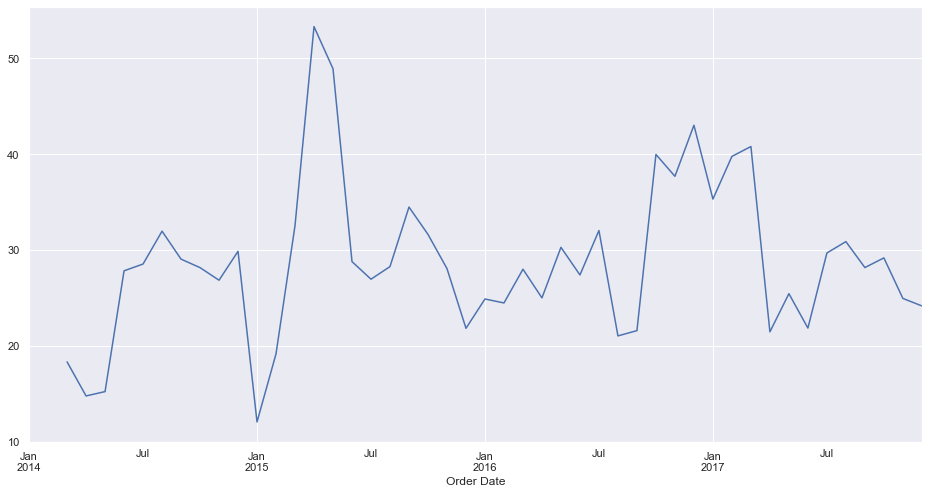

In [233]:
df4['Profit'].rolling(window = 3).mean().plot(figsize = (16,8))

<AxesSubplot:xlabel='Order Date'>

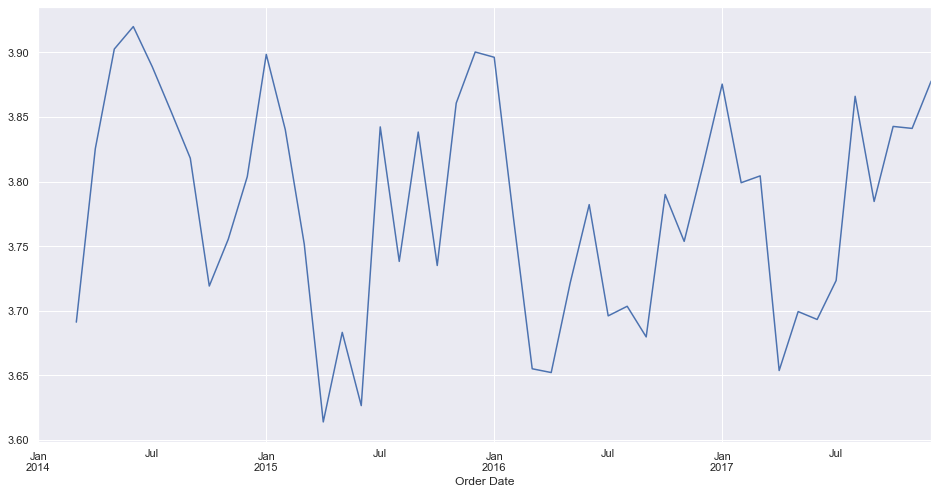

In [234]:
df4['Quantity'].rolling(window = 3).mean().plot(figsize = (16,8))

<AxesSubplot:xlabel='Order Date'>

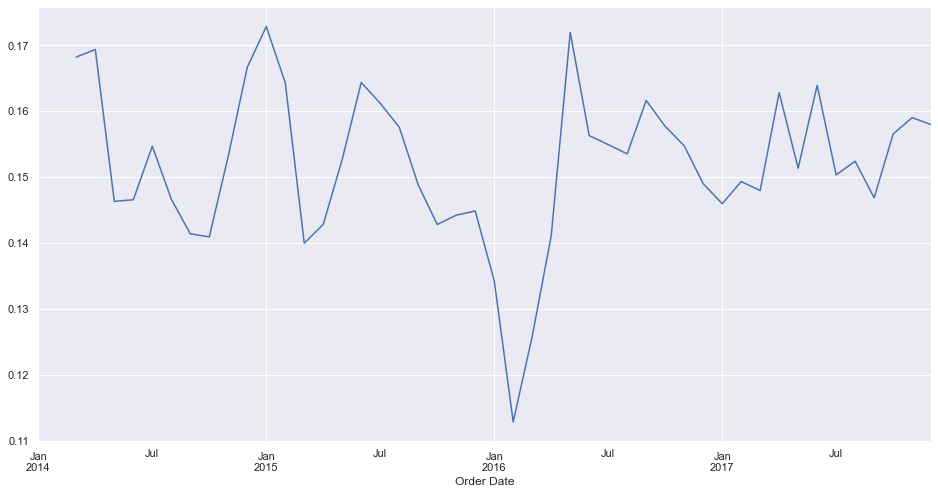

In [235]:
df4['Discount'].rolling(window = 3).mean().plot(figsize = (16,8))

In [239]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

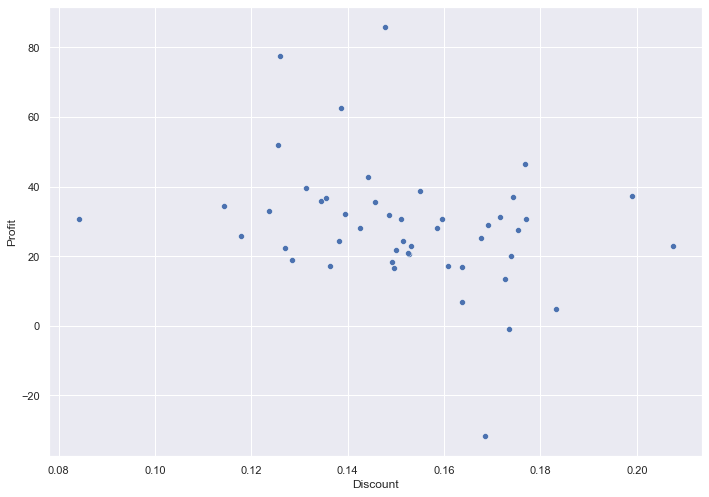

In [240]:
sns.scatterplot(data = df4, x = 'Discount', y = 'Profit')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

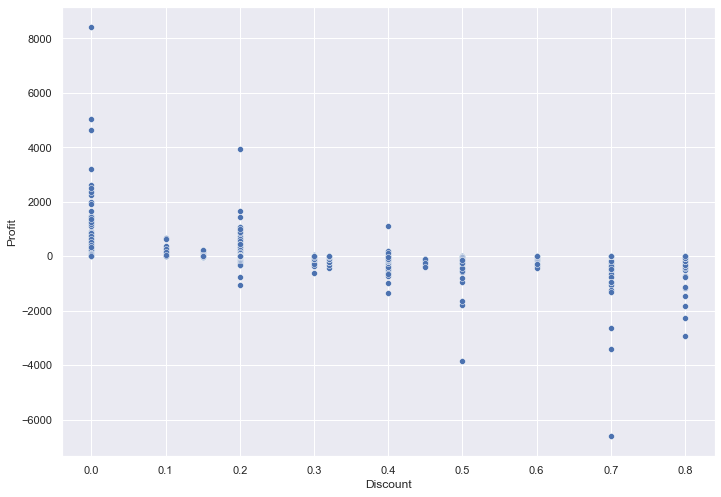

In [241]:
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')

<AxesSubplot:xlabel='Discount', ylabel='Margin'>

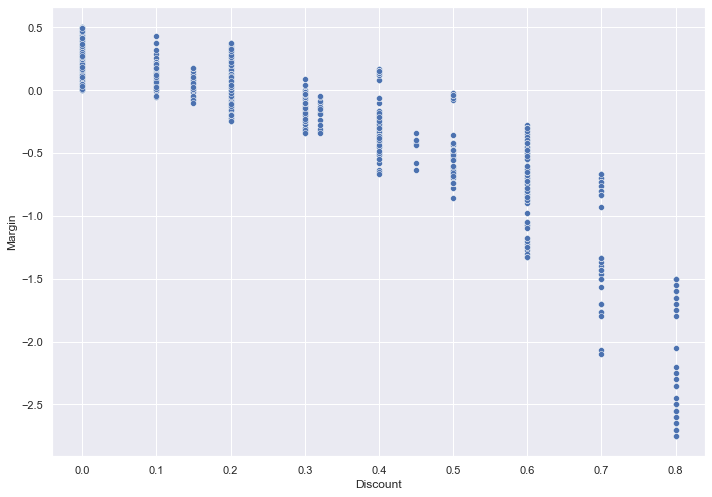

In [242]:
sns.scatterplot(data = df, x = 'Discount', y = 'Margin')

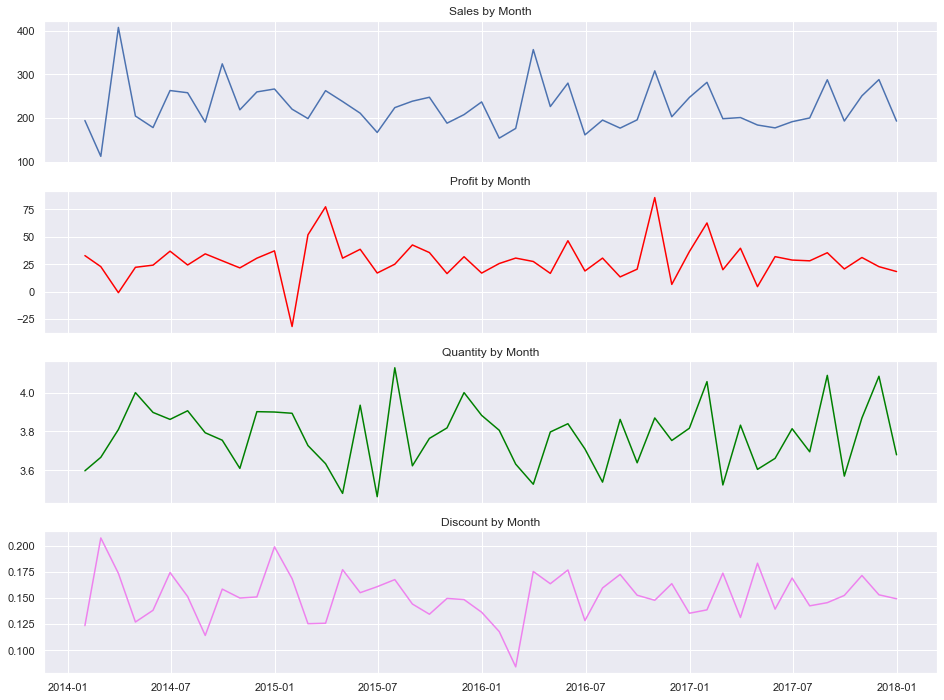

In [243]:
fig, ax = plt.subplots(4, 
           sharex='col', sharey='row', figsize=(16,12))

ax[0].plot(df4.index, "Sales", data=df4)
ax[0].set_title('Sales by Month')
ax[1].plot(df4.index, "Profit", data=df4, color = 'red')
ax[1].set_title('Profit by Month')
ax[2].plot(df4.index, "Quantity", data=df4, color = 'green')
ax[2].set_title('Quantity by Month')
ax[3].plot(df4.index, "Discount", data=df4, color = 'violet')
ax[3].set_title('Discount by Month')
plt.show()

In [247]:
df
df3

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,
2014-01-31,13972.1410,259,8.90,2371.5095,5.820231e+05,1.141717e+05,9.148807
2014-02-28,3019.8080,99,5.60,617.6065,4.300281e+05,7.690278e+04,0.627500
2014-03-31,49351.6230,461,21.00,-103.8131,4.731865e+06,2.777400e+05,14.048492
2014-04-30,22280.7450,436,13.85,2426.8582,8.532926e+06,4.638402e+05,22.754510
2014-05-31,17434.7090,382,13.55,2375.0458,9.397098e+06,6.128087e+05,14.241856
2014-06-30,30503.4916,448,20.22,4288.7032,1.430545e+07,1.196256e+06,11.794678
2014-07-31,27592.3000,418,16.20,2609.1479,1.568382e+07,1.400221e+06,16.680238
2014-08-31,22072.1885,440,13.25,4004.9768,2.041072e+07,1.982331e+06,26.726573
2014-09-30,67442.9298,781,32.97,5867.6780,4.531067e+07,4.044636e+06,26.238768


In [259]:
df4

,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,
2014-01-31,194.057514,3.597222,0.123611,32.937632,8.083654e+03,1585.717443,0.127067
2014-02-28,111.844741,3.666667,0.207407,22.874315,1.592697e+04,2848.251248,0.023241
2014-03-31,407.864653,3.809917,0.173554,-0.857960,3.910632e+04,2295.371672,0.116103
2014-04-30,204.410505,4.000000,0.127064,22.264754,7.828373e+04,4255.414995,0.208757
2014-05-31,177.905194,3.897959,0.138265,24.235161,9.588876e+04,6253.150506,0.145325
2014-06-30,262.961134,3.862069,0.174310,36.971579,1.233228e+05,10312.548822,0.101678
2014-07-31,257.871963,3.906542,0.151402,24.384560,1.465777e+05,13086.180500,0.155890
2014-08-31,190.277487,3.793103,0.114224,34.525662,1.759545e+05,17089.057728,0.230401
2014-09-30,324.244855,3.754808,0.158510,28.209990,2.178398e+05,19445.364203,0.126148


In [257]:
df2.groupby(pd.Grouper(freq = 'M')).count()


,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,,,,,,,,,
2014-01-31,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2014-02-28,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2014-03-31,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
2014-04-30,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
2014-05-31,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
2014-06-30,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
2014-07-31,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
2014-08-31,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
2014-09-30,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208


In [258]:
df2.groupby(pd.Grouper(freq = 'M')).nunique()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
Order Date,,,,,,,,,,,,,,,
2014-01-31,27,20,3,4,71,3,14,70,71,11,9,70,72,70,61
2014-02-28,17,17,4,4,26,3,10,26,27,7,4,27,27,27,25
2014-03-31,54,23,4,4,119,3,15,119,120,11,10,120,121,119,94
2014-04-30,51,23,4,4,106,3,16,106,101,14,6,104,109,109,79
2014-05-31,56,27,4,4,94,3,16,94,98,11,9,98,98,98,80
2014-06-30,55,22,4,4,114,3,16,111,116,11,8,113,116,112,89
2014-07-31,51,24,4,4,103,3,16,103,105,12,8,106,107,107,82
2014-08-31,55,23,4,4,113,3,16,113,112,12,9,112,116,116,81
2014-09-30,103,28,4,4,192,3,17,191,203,11,11,204,208,207,138


<AxesSubplot:xlabel='Order Date'>

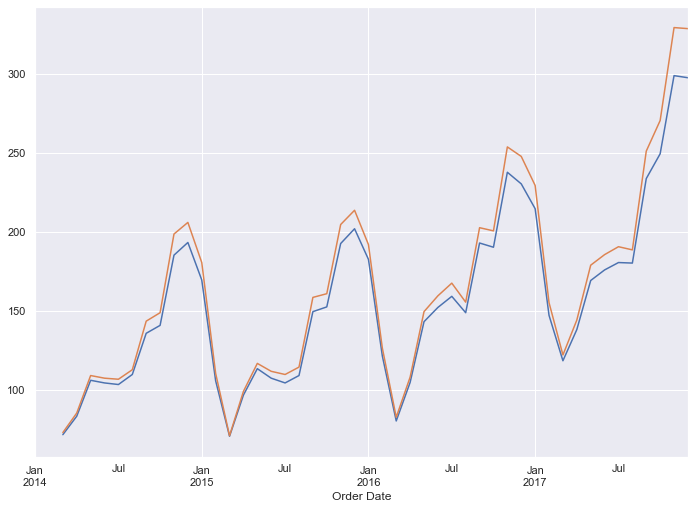

In [267]:
# df4['Discount'].rolling(window = 3).mean().plot(figsize = (16,8))
# df2.groupby(pd.Grouper(freq = 'M')).nunique()


df2['Product ID'].groupby(pd.Grouper(freq = 'M')).nunique().rolling(window = 3).mean().plot()
df2['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot()
# df2['Quantity'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

<AxesSubplot:xlabel='Order Date'>

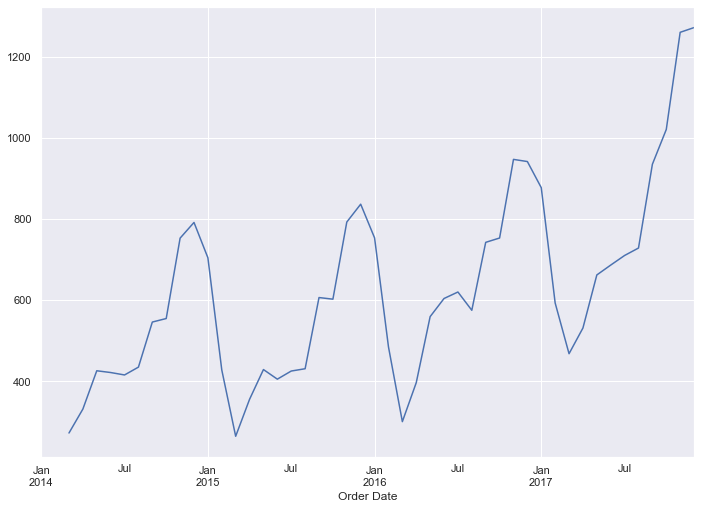

In [266]:
df2['Quantity'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

<AxesSubplot:xlabel='Order Date'>

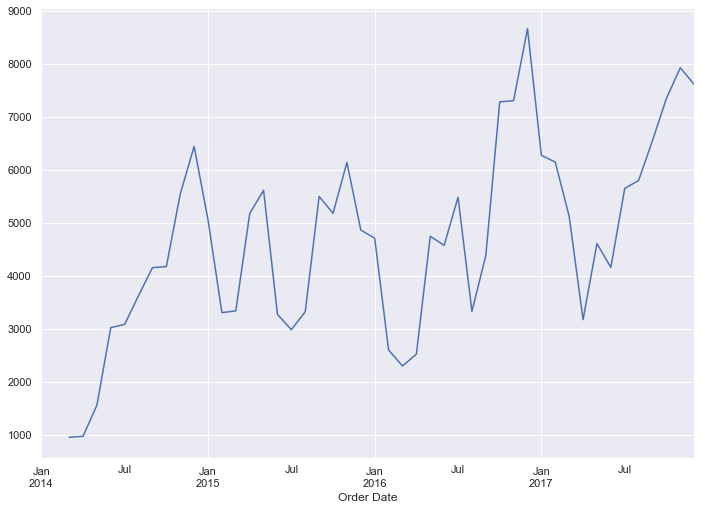

In [270]:
df2['Profit'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

<AxesSubplot:xlabel='Order Date'>

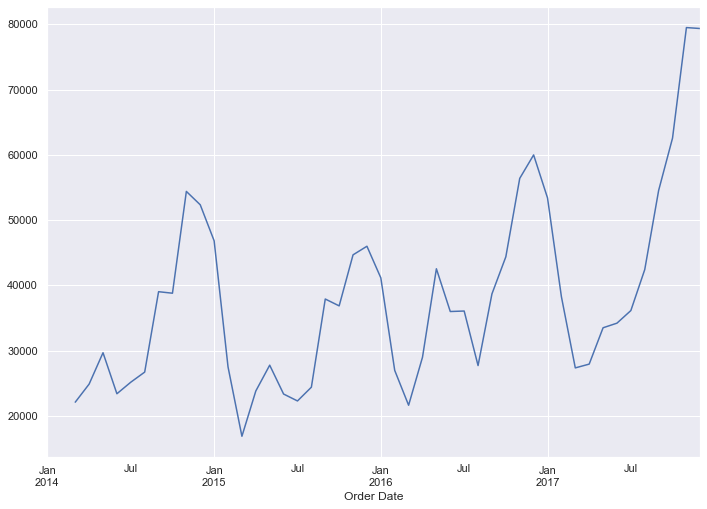

In [271]:
df2['Sales'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

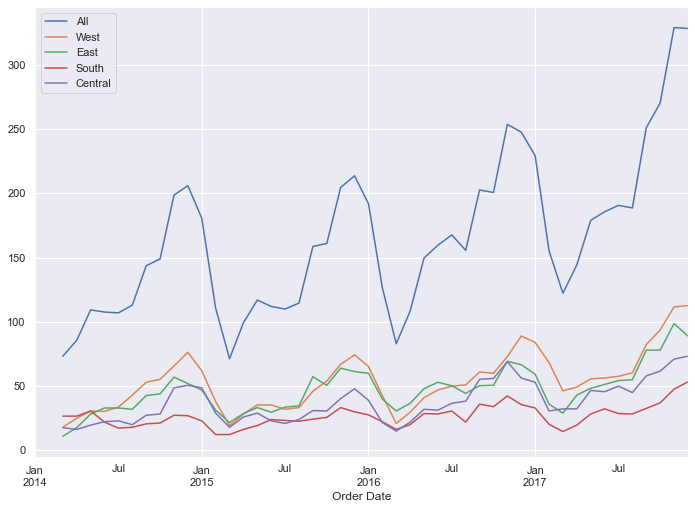

In [277]:
# df4['Discount'].rolling(window = 3).mean().plot(figsize = (16,8))
# df2.groupby(pd.Grouper(freq = 'M')).nunique()


df2['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'All')
df2[df2['Region'] == 'West']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'West')
df2[df2['Region'] == 'East']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'East')
df2[df2['Region'] == 'South']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'South')
df2[df2['Region'] == 'Central']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'Central')
plt.legend()
# df2['Quantity'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

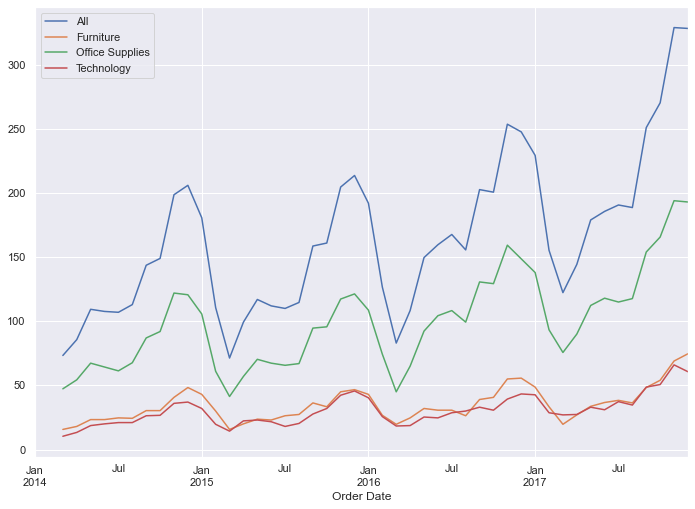

In [278]:
# df4['Discount'].rolling(window = 3).mean().plot(figsize = (16,8))
# df2.groupby(pd.Grouper(freq = 'M')).nunique()


df2['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'All')
df2[df2['Category'] == 'Furniture']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'Furniture')
df2[df2['Category'] == 'Office Supplies']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'Office Supplies')
df2[df2['Category'] == 'Technology']['Product ID'].groupby(pd.Grouper(freq = 'M')).count().rolling(window = 3).mean().plot(label = 'Technology')

plt.legend()
# df2['Quantity'].groupby(pd.Grouper(freq = 'M')).sum().rolling(window = 3).mean().plot()

In [294]:
df2['Category'].groupby(pd.Grouper(freq = 'M')).value_counts(True)

Order Date  Category       
2014-01-31  Office Supplies    0.625000
            Furniture          0.250000
            Technology         0.125000
2014-02-28  Office Supplies    0.629630
            Technology         0.222222
                                 ...   
2017-11-30  Furniture          0.213483
            Technology         0.202247
2017-12-31  Office Supplies    0.604167
            Furniture          0.231771
            Technology         0.164062
Name: Category, Length: 144, dtype: float64

<AxesSubplot:xlabel='Order Date'>

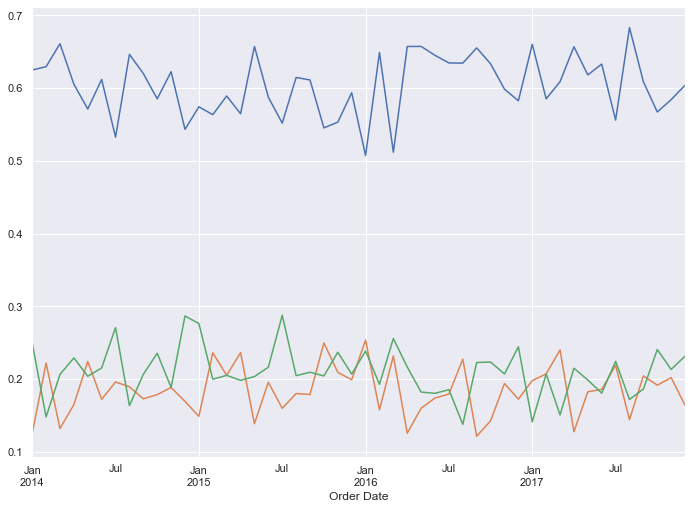

In [302]:
(df2[df2['Category'] == 'Office Supplies']['Category'].groupby(pd.Grouper(freq = 'M')).count() / df2['Category'].groupby(pd.Grouper(freq = 'M')).count()).plot()

(df2[df2['Category'] == 'Technology']['Category'].groupby(pd.Grouper(freq = 'M')).count() / df2['Category'].groupby(pd.Grouper(freq = 'M')).count()).plot()

(df2[df2['Category'] == 'Furniture']['Category'].groupby(pd.Grouper(freq = 'M')).count() / df2['Category'].groupby(pd.Grouper(freq = 'M')).count()).plot()

In [131]:
df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Running Sales,Running Profit,Margin
9973,CA-2014-103800,2014-01-03,Standard Class,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,16.448,5.5512,0.3375
2732,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,28.232,9.8229,0.3625
2734,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,31.772,4.3359,-1.5500
2733,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,304.508,-60.4389,-0.2375
3752,CA-2014-141817,2014-01-05,Standard Class,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,324.044,-55.5549,0.2500


## Takeaways

* a lot of missing values in the Profit column, replaced with the mean of the middle 80% of values, so that the extreme values don't influence the mean. We can update this later if we can get exact figures for the transactions or we can get pricing per item

* There were less sales shipped out of the South region, 16%, compared to 23%, 29%, annd 32% for Central, East, and West respectively\
* 60% of all transactions were categorized as Office Supplies, 21% as Furniture, 18% as Technology

* Transactions with 4 or less items saw higher margins

* West sells the most, South sells the least; this trend continues over time

In [52]:
prettyTable(df, 'Region')

,,
,Region,Region
West,32.56%,2605
East,28.38%,2270
Central,22.7%,1816
South,16.36%,1309


In [53]:
prettyTable(df, 'Category')

,,
,Category,Category
Office Supplies,60.5%,4840
Furniture,21.14%,1691
Technology,18.36%,1469
